# Collaboration and Competition

Neilkunal Panchal Deep RL nano Degree
---

In this notebook, you will learn how to use the Unity ML-Agents environment for the third project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:

from unityagents import UnityEnvironment
import numpy as np
import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [2]:
env = UnityEnvironment(file_name="/home/neilkunal/Desktop/DeepRL/deep-reinforcement-learning/p3_collab-compet/Tennis_Linux/Tennis.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, two agents control rackets to bounce a ball over a net. If an agent hits the ball over the net, it receives a reward of +0.1.  If an agent lets a ball hit the ground or hits the ball out of bounds, it receives a reward of -0.01.  Thus, the goal of each agent is to keep the ball in play.

The observation space consists of 8 variables corresponding to the position and velocity of the ball and racket. Two continuous actions are available, corresponding to movement toward (or away from) the net, and jumping. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.         -6.65278625 -1.5
 -0.          0.          6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agents and receive feedback from the environment.

Once this cell is executed, you will watch the agents' performance, if they select actions at random with each time step.  A window should pop up that allows you to observe the agents.

Of course, as part of the project, you'll have to change the code so that the agents are able to use their experiences to gradually choose better actions when interacting with the environment!

In [5]:
# for i in range(1, 6):                                      # play game for 5 episodes
#     env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
#     states = env_info.vector_observations                  # get the current state (for each agent)
#     scores = np.zeros(num_agents)                          # initialize the score (for each agent)
#     while True:
#         actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#         actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#         env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#         next_states = env_info.vector_observations         # get next state (for each agent)
#         rewards = env_info.rewards                         # get reward (for each agent)
#         dones = env_info.local_done                        # see if episode finished
#         scores += env_info.rewards                         # update the score (for each agent)
#         states = next_states                               # roll over states to next time step
#         if np.any(dones):                                  # exit loop if episode finished
#             break
#     print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

In [7]:
from ddpg_agent import Agents
import matplotlib.pyplot as plt
from collections import deque
# num_agents=1
# agent = Agents(state_size=state_size, action_size=action_size, num_agents=num_agents, random_seed=0)
# agent.action_size
agent_0 = Agents(state_size=state_size, action_size=action_size, num_agents=1, random_seed=0)
agent_1 = Agents(state_size=state_size, action_size=action_size, num_agents=1, random_seed=0)


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [8]:
# def ddpg(n_episodes=1000, max_t=10000, print_every=100):
#     """DDQN Algorithm.
    
#     Params
#     ======
#         n_episodes (int): maximum number of training episodes
#         max_t (int): maximum number of timesteps per episode
#         print_every (int): frequency of printing information throughout iteration """
    
#     scores = []
#     scores_deque = deque(maxlen=print_every)
    
#     for i_episode in range(1, n_episodes+1):
#         env_info = env.reset(train_mode=True)[brain_name]
#         agent.reset()
#         state = env_info.vector_observations[0]            # get the current state
#         score = 0
#         Toggle = True
#         combined_action = np.zeros(num_agents*action_size)
#         print("combined action is:", combined_action)
#         print("combined action[0:1] is:", combined_action[0:1])
#         for t in range(max_t):
#             action = agent.act(state)  
#             # select an action
# #             print(agent)
# #             print(state)
# #             print(action)
#             if Toggle:
#                 combined_action[2:4] = action 
#             else:
#                 combined_action[0:2] = action 
#             env_info = env.step(combined_action)[brain_name]        # send the action to the environment
#             next_state = env_info.vector_observations[0]   # get the next state
#             reward = env_info.rewards[0]                   # get the reward
#             done = env_info.local_done[0]                  # see if episode has finished
#             agent.step(state, action, reward, next_state, done) # take step with agent (including learning)
#             score += reward                                # update the score
#             state = next_state                             # roll over the state to next time step
#             if done:                                       # exit loop if episode finished
#                 break
        
#         scores_deque.append(score)       # save most recent score
#         scores.append(score)             # save most recent score

#         print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)), end="")
        
#         if i_episode % print_every == 0:
#             print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
#             torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
#             torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
        
#         if np.mean(scores_deque)>=30.0:
#             print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
#             torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
#             torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
#             break
            
#     return scores

In [9]:
def get_actions(states, add_noise):
    '''gets actions for each agent and then combines them into one array'''
    action_0 = agent_0.act(states, add_noise)    
    action_1 = agent_1.act(states, add_noise)   
    return np.concatenate((action_0, action_1), axis=0).flatten()

The Training is solved when the average over 100 episodes is greater than 0.5

In [10]:

solved = 0.5
consecutiveEpisodes = 100
printFrequency = 10
addNoise = True

def Maddpg(n_episodes=2000, max_t=1000, train_mode=True):
    """Multi-Agent Deep Deterministic Policy Gradient (MADDPG)
    
    Params
    ======
        n_episodes (int)      : maximum number of training episodes
        max_t (int)           : maximum number of timesteps per episode
        train_mode (bool)     : if 'True' set environment to training mode

    """
    scores_window = deque(maxlen=consecutiveEpisodes)
    scores_all = []
    moving_average = []
    best_score = -np.inf
    best_episode = 0
    already_solved = False    

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]  
        states = np.reshape(env_info.vector_observations, (1,48)) # combine states
        agent_0.reset()
        agent_1.reset()
        scores = np.zeros(num_agents)
        while True:
            actions = get_actions(states, addNoise)           
            env_info = env.step(actions)[brain_name]          
            next_states = np.reshape(env_info.vector_observations, (1, 48)) # combine the agent next states
            rewards = env_info.rewards                         # get reward
            done = env_info.local_done                         # see if episode finished
            agent_0.step(states, actions, rewards[0], next_states, done, 0) # agent 1 learning
            agent_1.step(states, actions, rewards[1], next_states, done, 1) # agent 2 learning
            scores += np.max(rewards)                          # update the score for each agent
            states = next_states                              
            if np.any(done):                                   # exit loop if episode finished
                break

        ep_best_score = np.max(scores)
        scores_window.append(ep_best_score)
        scores_all.append(ep_best_score)
        moving_average.append(np.mean(scores_window))

        # save best score                        
        if ep_best_score > best_score:
            best_score = ep_best_score
            best_episode = i_episode
        
        # print results
        if i_episode % printFrequency == 0:
            print('Episodes {:0>4d}-{:0>4d}\tMax Reward: {:.3f}\tMoving Average: {:.3f}'.format(
                i_episode-printFrequency, i_episode, np.max(scores_all[-printFrequency:]), moving_average[-1]))

        # determine if environment is solved and keep best performing models
        if moving_average[-1] >= solved:
            if not already_solved:
                print('<-- Environment solved in {:d} episodes! \
                \n<-- Moving Average: {:.3f} over past {:d} episodes'.format(
                    i_episode-consecutiveEpisodes, moving_average[-1], consecutiveEpisodes))
                already_solved = True
                # save weights
                torch.save(agent_0.actor_local.state_dict(), 'checkpoint_actor_0.pth')
                torch.save(agent_0.critic_local.state_dict(), 'checkpoint_critic_0.pth')
                torch.save(agent_1.actor_local.state_dict(), 'checkpoint_actor_1.pth')
                torch.save(agent_1.critic_local.state_dict(), 'checkpoint_critic_1.pth')
            elif ep_best_score >= best_score:
                print('<-- Best episode so far!\
                \nEpisode {:0>4d}\tMax Reward: {:.3f}\tMoving Average: {:.3f}'.format(
                i_episode, ep_best_score, moving_average[-1]))
                # save weights
                torch.save(agent_0.actor_local.state_dict(), 'checkpoint_actor_0.pth')
                torch.save(agent_0.critic_local.state_dict(), 'checkpoint_critic_0.pth')
                torch.save(agent_1.actor_local.state_dict(), 'checkpoint_actor_1.pth')
                torch.save(agent_1.critic_local.state_dict(), 'checkpoint_critic_1.pth')
            elif (i_episode-best_episode) >= 100:
                # stop training if model stops converging
                print('<-- Training stopped. Best score not matched or exceeded for 200 episodes')
                break
            else:
                continue
            
    return scores_all, moving_average

Episodes 0000-0010	Max Reward: 0.000	Moving Average: 0.000
Episodes 0010-0020	Max Reward: 0.000	Moving Average: 0.000
Episodes 0020-0030	Max Reward: 0.100	Moving Average: 0.007
Episodes 0030-0040	Max Reward: 0.000	Moving Average: 0.005
Episodes 0040-0050	Max Reward: 0.100	Moving Average: 0.008
Episodes 0050-0060	Max Reward: 0.100	Moving Average: 0.015
Episodes 0060-0070	Max Reward: 0.100	Moving Average: 0.016
Episodes 0070-0080	Max Reward: 0.200	Moving Average: 0.019
Episodes 0080-0090	Max Reward: 0.000	Moving Average: 0.017
Episodes 0090-0100	Max Reward: 0.100	Moving Average: 0.018
Episodes 0100-0110	Max Reward: 0.200	Moving Average: 0.022
Episodes 0110-0120	Max Reward: 0.200	Moving Average: 0.027
Episodes 0120-0130	Max Reward: 0.200	Moving Average: 0.029
Episodes 0130-0140	Max Reward: 0.100	Moving Average: 0.031
Episodes 0140-0150	Max Reward: 0.200	Moving Average: 0.034
Episodes 0150-0160	Max Reward: 0.100	Moving Average: 0.034
Episodes 0160-0170	Max Reward: 0.200	Moving Average: 0.0

Episodes 1340-1350	Max Reward: 2.300	Moving Average: 0.913
Episodes 1350-1360	Max Reward: 4.800	Moving Average: 1.018
Episodes 1360-1370	Max Reward: 3.000	Moving Average: 1.091
Episodes 1370-1380	Max Reward: 5.200	Moving Average: 1.268
Episodes 1380-1390	Max Reward: 5.100	Moving Average: 1.441
Episodes 1390-1400	Max Reward: 4.800	Moving Average: 1.542
Episodes 1400-1410	Max Reward: 5.200	Moving Average: 1.722
<-- Training stopped. Best score not matched or exceeded for 200 episodes


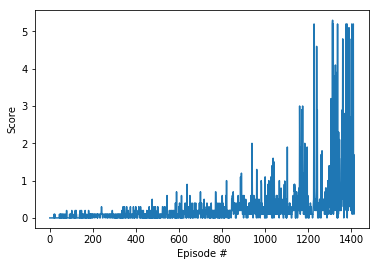

In [11]:
scores, averages = Maddpg()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [12]:
CONSEC_EPISODES = 10
PRINT_EVERY = 1
addNoise = False

In [15]:
## reinitialize the agents (if needed)
agent_0 = Agents(state_size, action_size, num_agents=1, random_seed=0)
agent_1 = Agents(state_size, action_size, num_agents=1, random_seed=0)

# load the weights from file
agent_0_weights = 'checkpoint_actor_0.pth'
agent_1_weights = 'checkpoint_actor_1.pth'
agent_0.actor_local.load_state_dict(torch.load(agent_0_weights))
agent_1.actor_local.load_state_dict(torch.load(agent_1_weights))

In [ ]:
def test(n_episodes=10, max_t=1000, train_mode=False):

    scores_window = deque(maxlen=consecutiveEpisodes)
    scores_all = []
    moving_average = []  

    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=train_mode)[brain_name]         # reset the environment
        states = np.reshape(env_info.vector_observations, (1,48)) # get states and combine them
        scores = np.zeros(num_agents)
        while True:
            actions = get_actions(states, addNoise)           # choose agent actions and combine them
            env_info = env.step(actions)[brain_name]           # send both agents' actions together to the environment
            next_states = np.reshape(env_info.vector_observations, (1, 48)) # combine the agent next states
            rewards = env_info.rewards                         # get reward
            done = env_info.local_done                         # see if episode finished
            scores += np.max(rewards)                          # update the score for each agent
            states = next_states                               # roll over states to next time step
            if np.any(done):                                   # exit loop if episode finished
                break

        ep_best_score = np.max(scores)
        scores_window.append(ep_best_score)
        scores_all.append(ep_best_score)
        moving_average.append(np.mean(scores_window))

        # print results
        if i_episode % printFrequency == 0:
            print('Episodes {:0>4d}-{:0>4d}\tMax Reward: {:.3f}\tMoving Average: {:.3f}'.format(
                i_episode-printFrequency, i_episode, np.max(scores_all[-PRINT_EVERY:]), moving_average[-1]))
            
    return scores_all, moving_average
test()


Episodes 0000-0001	Max Reward: 5.200	Moving Average: 5.200
Episodes 0001-0002	Max Reward: 5.200	Moving Average: 5.200
